In [36]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

Q1. Tom is working in a credit card processing company as a team leader. His team is responsible to validate certain data for new credit card applications. The time spent by his team on an application is normally distributed with average 300 minutes and standard deviation 40 minutes.Tom and his team worked on process improvement to reduce the time spent in processing new applications. After implementing the improvements, Tom checked the time spent by his team on randomly selected 25 new card applications. The average time spent is 290 min. Tom is happy that, though it is a small improvement, it is a step in right direction. He shares the good news with his manager Lisa. But Lisa in not convinced about the improvement. At 95% confidence, is the processes really improved?

Step 1: Given: n = 25, x¯¯ = 290, σ = 40, μ = 300

• Step 2: Let us formulate the hypothesis. H0 (null hypothesis): μ (population mean) = 300

H1 (alternate hypothesis): μ (population mean) < 300

[this is an example of a one-tailed test]

• Step 3: Define the test statistic based on the information in the question. Here, we are going to use the Zstat .

Let us calculate the value of the test statistic.

In [2]:
z = ((290-300)/(40/np.sqrt(25)))
z

-1.25

From the value of the Zstat , we understand that this is a lower tailed-test.

• Step 4.1: Let us check the critical value with respect to α for the test statistic.

In [3]:
#The following code snippet helps us to calculate the value of the z-statistic from the z-table.
cv = stats.norm.ppf(0.05,0,1)
print(cv)

-1.6448536269514729


Here, the calculated Zstat value is less than -1.64. Thus, this value does not fall in the rejection region.

Hence, we are failing to reject the H0 i.e accept the Null Hypothesis. μ (population mean) is equal to 300.



• Step 4.2: Let us calculate the p-value and compare it with α .

In [4]:
p_value = stats.norm.sf(abs(z))
p_value

0.10564977366685535

In [5]:
1 - stats.norm.cdf(abs(z))

0.10564977366685535

We see that the p-value > α . Thus, it is confirmed we are failing to reject the the null hypothesis.

With 95% confidence, we are able to accept the Null Hypothesis.

# Question 2

Q2.The Titan Insurance Company has just installed a new incentive payment scheme for its life policy sales-force. It wants to have an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference. Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by that person during the month.

Titan's new scheme is that the sales force receive low regular salaries but are paid large bonuses related to their output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company but they are looking for sales increases to compensate for it. The scheme has now been in operation for four months. It has settled down after fluctuations in the first two months due to the changeover.

To test the effectiveness of the scheme, Titan has taken a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in the fourth month after the changeover (they have deliberately chosen months not too close to the changeover).

# Importing CSV 

In [9]:
import os
os.getcwd()

'C:\\Users\\anchhabra\\Python_Training_DSBA_GL\\SMDM\\Week_3'

In [17]:
df = pd.read_csv('Titan_Case_Study.csv') # read the data as a data frame

# Checking the top 5 rows

In [50]:
df.head()

,Salesperson,Old Scheme,New Scheme,diff
0,1,57,62,-5
1,2,103,122,-19
2,3,59,54,5
3,4,75,82,-7
4,5,84,84,0


# Checking Summary of data

In [51]:
df.describe()

,Salesperson,Old Scheme,New Scheme,diff
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,68.033333,72.033333,-4.000000
std,8.803408,20.455980,24.062395,14.081046
min,1.000000,28.000000,32.000000,-25.000000
25%,8.250000,54.000000,55.000000,-16.000000
50%,15.500000,67.000000,74.000000,-7.500000
75%,22.750000,81.500000,85.750000,6.750000
max,30.000000,110.000000,122.000000,34.000000


# Check for missing values

In [52]:
# Check for missing value in any colum
df.isnull().sum()

Salesperson    0
Old Scheme     0
New Scheme     0
diff           0
dtype: int64

There are no missing values in the dataset.

# Plot Histograms and boxplot

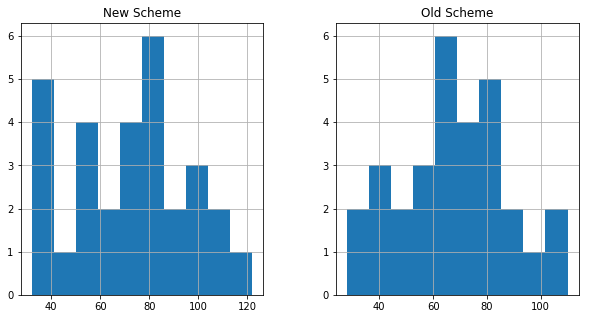

In [53]:
df.iloc[:,1:3].hist(figsize=(10,5))
plt.show()

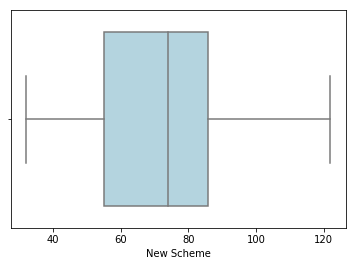

In [54]:
sns.boxplot(x= df['New Scheme'], color='lightblue')
plt.show()

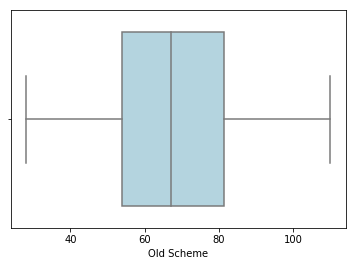

In [55]:
sns.boxplot(x= df['Old Scheme'], color='lightblue')
plt.show()

- Mean and Median Values of each sample are not much different.

- The Old scheme data looks more symmetrically distributed, whereas the New scheme data looks left skewed.

# Describe the five per cent significance test you would apply to these data to determine whether new scheme has significantly raised outputs?

- The level of significance (Alpha ) = 0.05.

- But since the population standard deviation (Sigma) is unknown, we have to use a Tstat test.

- Degree of Freedom: Since the sample is the same for both Sampling tests, we have N-1 degrees of freedom : 29

- Since the sole purpose of the test is to check whether the New scheme is successful compared to old scheme, we would prefer a One-sided T-test.

Hypothesis Formulation

Use the T Test: Paired two Sample for Means:

- Ho = $\mu_{old} - \mu_{new} \geq 0$      (New Scheme did not raise the output significantly)

- Ha = $\mu_{old} - \mu_{new} < 0$      (New Scheme raised the output significantly)

In [25]:
# Test Statistic 
t, p_value  = stats.ttest_rel(df['Old Scheme'],df['New Scheme'])  #Performing a paired t-test

In [26]:
 #Performing a paired t-test
print(t, p_value) #Python gives us a two tailed test. The pvalue here is for two-tailed test.

-1.5559143823544377 0.13057553961337662


In [28]:
#The following is the pvalue for a one-tailed test.
p_value/2

0.06528776980668831

#### Note: The value of the test statistic does not change for a two-tailed test or a one-tailed test. Only the pvalue or the probability value associated with the test statistic changes.

In [29]:
print ('The T statistic is:',t,'\n''The corresponding pvalue is :',(p_value/2))

The T statistic is: -1.5559143823544377 
The corresponding pvalue is : 0.06528776980668831


# What conclusion does the test lead to?

In this scenario, the p value is 0.065 which is greater than the 0.05. Hence accept the null hypothesis that the new scheme did not raise the output significantly. 

# What reservations have you about this result?

- If we compare the means of the two sample distributions, we see that even though visually it seems as if New scheme has fared better, statistically it does not hold.
- The higher mean in the case of New scheme can also be attributed to the higher variance compared to Old Scheme.
- The variance of the second data set, 579.00, is 38% more than the variance of the first data set, 418.45. (Squaring of the standard deviation values gives us the values of the variance)
- We are unsure of the sampling error present in the data.
- Unpredictable pattern persist even after the bonus scheme direct the management to work on the lift (product portfolio) and to correct the bonus scheme in proportion to revenue generation rather than policy sale.
- The scheme is expensive for the company but they are looking to compensate it by increase in sales. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months. So, it's better for the management to wait for another two months.
- There is dip in the New Scheme towards end of the cycle, which suggests that the Sales team may have booked all their sales at the earlier part of the period to get their incentives early or may be waiting till the end of quarter (measurement period) to book all their sales at once. Hence aggregation of data for a quarter may provide more clarity on the performance than for a single month.

# Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000. If this figure is alternative hypothesis, what is:

- The probability of a type 1 error?
- The probability of a type 2 error?
- The power of the test?

Type I error (𝜶): Probability of rejecting the null hypothesis when it is true. The probability of a Type I error in hypothesis testing is predetermined by the significance level.

Type II error (𝜷) : Probability of failing to reject null when it is false. Type II error calculation depends on the population mean which is unknown.

If alternate hypothesis $\mu_{New Scheme} – \mu_{Old Scheme} = \mu_d$ = £5000 is true. What is the type I and II error?

- Null Hypothesis = $\mu_{New Scheme} – \mu_{Old Scheme} = \mu_d$ = 0
- First we need to calculate the probability of Type I error which is predetermined by the significance level. If the significance level is 0.05, then type I error is 0.05. i.e. 5% probability we make Type I error i.e. rejecting the null hypothesis when it is true.
- Type II error calculation depends on a particular value of $\mu$. In this case lets assume difference of population $\mu_d$ is £5K. Lets also assume that the significance level for the test is 0.05. 
Then the calculation is as below :
- This is a right tailed test

Refer to appendix for steps for conducting paired t-tests (given at the end of casestudy)

## Finding Sample Standard Deviation for paired t-test

In [38]:
df['diff'] = df['Old Scheme']- df['New Scheme']

In [44]:
df['diff'].std()
#this code snippet by default takes N-1 as the degrees of freedom

14.08104619937615

In [48]:
# np.std(df.diff, ddof=1)
# # using numerical python's (NumPy) std function. We need to add ddof=1 for calculating sample sample sd

We can calculate the standard deviation using both the function if we adjust the parameters appropriately.

In [49]:
# T critical at 5% confidence level with 29 Degree of Freedom: 
value = abs(stats.t.ppf(0.05, 29))
value

1.6991270265334977

We fail to reject the null hypothesis (commit a type II error) if we get a T-statistic less than 1.699127 for the sample size of 30

To begin with, we need to find the $\overline{D}$ until we fail to reject the null hypothesis. Then we need to identify the probability of calculated $\overline{D}$ appearing when the $\mu_𝑑$ = £5000.

# $𝑡_{𝑠𝑡𝑎𝑡}=\frac{(\overline{d}− \mu_D)}{𝑆_𝑑/\sqrt{𝑛}}$

## 1.699=$\frac{(\overline{d}-0)}{14.081/\sqrt(30)}$

In [0]:
#From the above equation d-bar is


4.367835261153061

The above calculation states that we will incorrectly fail to reject the null hypothesis as long as we draw samples where the difference of mean is less than £4.37K.

Now given $\mu_{old} – \mu_{new} = 5K$, we can compute the probability of drawing the sample mean difference lesser than 4.37K as follows:

In [0]:
#Using the formula mentioned above we get the value of the t-statistic



-0.24505731924455268

# Probability of Type II Error ($\beta$)

0.40409092020034065

In [0]:
print('Hence, Probability of making Type II Error is',round(p*100,3),'%')

Hence, Probability of making Type II Error is 40.409 %


# Power of the Test:
    
Power of the hypothesis test is 1 minus the probability of Type II error.
Basically the power of a test is the probability that we make the right decision when the null is not correct (i.e. we correctly reject it)

In [0]:
print("Power of test is", round((1- p)*100,3),'%' )

Power of test is 59.591 %


# Extra Question

# What sample size would make the probabilities of type 1 and type 2 errors equal?

Let us assume we need Type 1 error and Type 2 error equal to .05

Assuming sample standard deviation is equal to population standard deviation, we can calculate sample size needed as below :

- Null hypothesis mean difference (M0) is 0
- Alternative hypothesis mean difference (Ma) is 5
- Sample standard Deviation is 14.081
- Alpha value is 0.05
- Beta value is 0.05 i.e. power of test is 0.95 = 95%

Sample Size calculation :

In [0]:
import statsmodels.stats.power as smp

smp.tt_solve_power(effect_size=(5/14.081), nobs=None, alpha=0.05, power=0.95, alternative='larger')
#here,since it is paired t-test, we are to take the difference of two means and then divide it by the standard deviation
#Also, we are passing the code snippet for one-sample t-test as Python only has a independent two-sample t-test command
#for the formula.

87.2028168330645

# Conclusion

From the given data, it may be concluded that, statistically there is no significant increase in sales because of the new incentive plan. However, our recommendation is that the test be carried out with a larger sample size covering a longer test period (at least a quarter) to improve the accuracy of test result and negating any one-time effect on the sales performance. Also, the results need to be interpreted and future actions be planned with the understanding of overall business performance.

# Appendix

## Procedure for carrying out a paired t-test
    Suppose a sample of n students were given a diagnostic test before studying a particular
    module and then again after completing the module. We want to find out if, in general,
    our teaching leads to improvements in students’ knowledge/skills (i.e. test scores). We
    can use the results from our sample of students to draw conclusions about the impact of
    this module in general
    
   Let x = test score before the module, y = test score after the module
   To test the null hypothesis that the true mean difference is zero, the procedure is as
   follows:
    1. Calculate the difference (di = yi − xi) between the two observations on each pair,
    making sure you distinguish between positive and negative differences.
    2. Calculate the mean difference, d.
    3. Calculate the standard deviation of the differences, sd, and use this to calculate the
    standard error of the mean difference, SE(d) = sd/√n
    4. Calculate the t-statistic, which is given by T =d/SE(d), Under the null hypothesis, this statistic follows a t-distribution with n − 1 degrees of freedom.
    5. Use tables of the t-distribution to compare your value for T to the tn-1 distribution.
    This will give the p-value for the paired t-test.